# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

%matplotlib inline

In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 4026


In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 1175


In [7]:
# Creating a function to use to get sentiments and put into a dataframe. 

def get_sentiments_dataframe(news):
    articles = []
    for article in news["articles"]: 
        try:
            text = article["content"]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            articles.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                "Text": text
            })
        except AttributeError:
            pass
    return pd.DataFrame(articles)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# Can use code below to get sentiments and put into dataframe without using the fuction created above.

bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
columns = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[columns]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi..."
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
3,-0.7184,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...
4,0.2500,0.000,0.941,0.059,"2018’s jokes are 2020’s reality. I’m speaking,..."


In [9]:
# Create the ethereum sentiment scores DataFrame
# Dataframe created using the function that was created. 
ethereum_df = get_sentiments_dataframe(ethereum_news)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.0000,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
3,-0.4215,0.132,0.783,0.085,Portions of the global economy melted down in ...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A worker pushing a trolley walks w...


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.065920,0.039200,0.908500,0.052250
std,0.440362,0.069395,0.082021,0.069699
min,-0.718400,0.000000,0.771000,0.000000
25%,-0.068300,0.000000,0.836250,0.000000
50%,0.000000,0.000000,0.929500,0.020500
75%,0.310275,0.064250,1.000000,0.078500
max,0.822500,0.203000,1.000000,0.229000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.168438,0.016188,0.922813,0.061062
std,0.366023,0.037754,0.091890,0.083940
min,-0.421500,0.000000,0.703000,0.000000
25%,0.000000,0.000000,0.861500,0.000000
50%,0.000000,0.000000,0.942000,0.023000
75%,0.416125,0.000000,1.000000,0.083500
max,0.946800,0.132000,1.000000,0.297000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score, with a score of 0.061.  This is in comparison to the Bitcoin mean positive score of 0.052.  This shows that on average across all articles analyzed, Ethereum had a more positive average of sentiments.

Q: Which coin had the highest compound score?

A: Ethereum also had the highest compound sentiment score, with a max score of 0.9468.  Bitcoin had a max compound sentiment score of 0.8225.  For comparision, Ethereum had a low compound score of -0.4215 vs. a Bitcoin low compound score of -0.7184.  

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive sentiment score, with a max score of 0.297.  This compares to Bitcoin's max positive score of 0.229. The max scores were close in comparison, leading me to believe that Ethereum had more overall high positive sentiment scores, which drove their high positive mean score compared to Bitcoin.  However, it is worth noting that the sample size for Bitcoin was 20 vs. a sample size of 16 for Ethereum.  This could skew data slightly. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

sw = set(stopwords.words("english"))

In [190]:
 # Expand the default stopwords list if necessary
sw_adds = {"’", "'s", "``", "…" }

In [191]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Create a list of the words
    words = word_tokenize(text)
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw.union(sw_adds), words))
    # Convert the words to lowercase 
    words = list(filter(lambda w: w.lower(), words))
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]

    return tokens

In [192]:
# # Create a new tokens column for bitcoin
bitcoin_df['Tokens'] = bitcoin_df["Text"].apply(tokenizer)

In [193]:
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[PayPal, partnered, cryptocurrency, company, P..."
1,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi...","[Two, day, ago, 1, billion, worth, bitcoin, sa..."
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[PayPal, rolling, cryptocurrency, support, lat..."
3,-0.7184,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...,"[Financial, Crimes, Enforcement, Network, FinC..."
4,0.2500,0.000,0.941,0.059,"2018’s jokes are 2020’s reality. I’m speaking,...","[2018, joke, 2020, reality, speaking, course, ..."


In [194]:
# Create a new tokens column for ethereum
ethereum_df['Tokens'] = ethereum_df["Text"].apply(tokenizer)

In [195]:
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[PayPal, partnered, cryptocurrency, company, P..."
1,0.0000,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...,"[Breitling, partnering, Arianee, issue, new, k..."
2,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[PayPal, rolling, cryptocurrency, support, lat..."
3,-0.4215,0.132,0.783,0.085,Portions of the global economy melted down in ...,"[Portions, global, economy, melted, 2020, emer..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A worker pushing a trolley walks w...,"[FILE, PHOTO, worker, pushing, trolley, walk, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [196]:
from collections import Counter
from nltk import ngrams

In [197]:
# Generate the Bitcoin N-grams where N=2
bitcoin_combined = tokenizer(bitcoin_df['Text'].str.cat())
# print(bitcoin_combined)

word_counts = Counter(bitcoin_combined)
# print(dict(word_counts))

bigram_counts = Counter(ngrams(bitcoin_combined, n=2))
# print(dict(bigram_counts))

print(dict(bigram_counts.most_common(20)))

{('virtual', 'currency'): 5, ('LONDON', 'Reuters'): 5, ('FILE', 'PHOTO'): 4, ('Reuters', 'Bitcoin'): 4, ('level', 'since'): 3, ('since', 'January'): 3, ('January', '2018'): 3, ('char', 'Reuters'): 3, ('Reuters', 'Staff'): 3, ('Staff', 'FILE'): 3, ('PHOTO', 'Representations'): 3, ('Representations', 'virtual'): 3, ('currency', 'Bitcoin'): 3, ('Bitcoin', 'seen'): 3, ('seen', 'picture'): 3, ('picture', 'illustration'): 3, ('illustration', 'taken'): 3, ('taken', 'taken'): 3, ('taken', 'March'): 3, ('March', '13'): 3}


In [198]:
# Generate the Ethereum N-grams where N=2
ethereum_combined = tokenizer(ethereum_df['Text'].str.cat())
# print(bitcoin_combined)

word_counts = Counter(ethereum_combined)
# print(dict(word_counts))

bigram_counts = Counter(ngrams(ethereum_combined, n=2))
# print(dict(bigram_counts))

print(dict(bigram_counts.most_common(20)))

{('char', 'LONDON'): 4, ('LONDON', 'Reuters'): 4, ('Reuters', 'PayPal'): 4, ('PayPal', 'Holdings'): 4, ('Holdings', 'Inc'): 4, ('joined', 'cryptocurrency'): 4, ('cryptocurrency', 'market'): 4, ('market', 'Wednesday'): 4, ('Wednesday', 'allowing'): 4, ('allowing', 'customer'): 4, ('customer', 'buy'): 4, ('buy', 'sell'): 4, ('sell', 'hold'): 4, ('hold', 'bitcoin'): 4, ('bitcoin', 'virtual'): 4, ('virtual', 'coin'): 4, ('coin', 'using'): 4, ('using', 'U.S.'): 4, ('U.S.', 'digital'): 4, ('digital', 'payment'): 4}


In [199]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [200]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_combined)

[('char', 20),
 ('Bitcoin', 12),
 ('Reuters', 11),
 ('taken', 7),
 ('PayPal', 6),
 ('bitcoin', 6),
 ('virtual', 5),
 ('currency', 5),
 ('LONDON', 5),
 ('cryptocurrency', 4)]

In [201]:
# Get the top 10 words for Ethereum
token_count(ethereum_combined)

[('char', 16),
 ('PayPal', 10),
 ('cryptocurrency', 8),
 ('Wednesday', 7),
 ('U.S.', 6),
 ('2020', 6),
 ('buy', 5),
 ('hold', 5),
 ('sell', 5),
 ('using', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [202]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

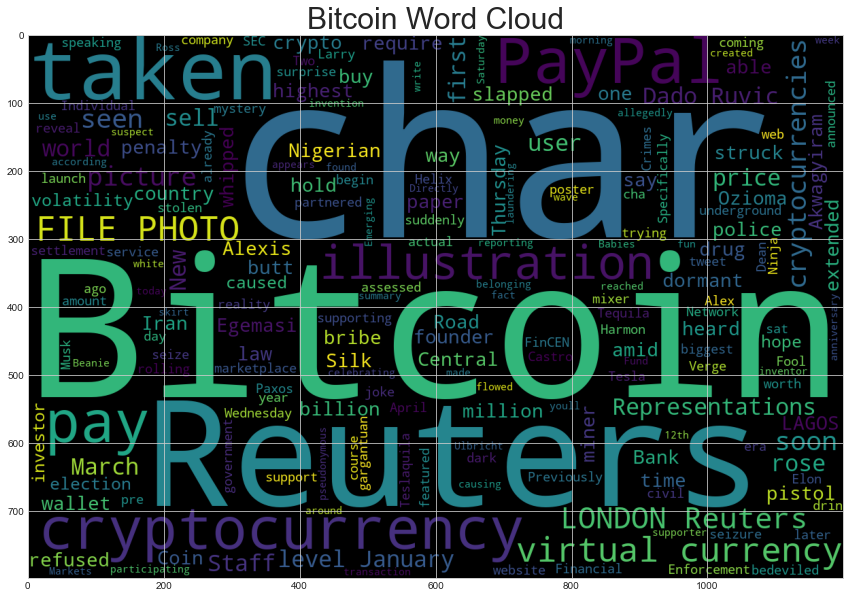

In [236]:
# Generate the Bitcoin word cloud
bitcoin_string = " ".join(bitcoin_combined)
wc = WordCloud(width=1200, height=800).generate(bitcoin_string)
plt.title("Bitcoin Word Cloud", fontsize=30)
plt.imshow(wc)

# Can set max_words=100 if desired, but current word cloud shows all words. 

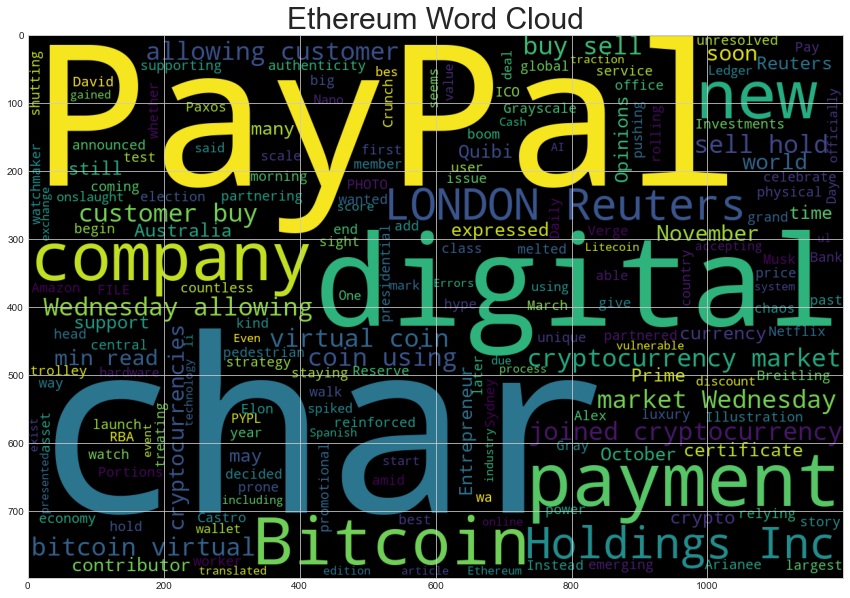

In [240]:
# Generate the Ethereum word cloud
ethereum_string = " ".join(ethereum_combined)
wc = WordCloud(width=1200, height=800).generate(ethereum_string)
plt.title("Ethereum Word Cloud", fontsize=30)
plt.imshow(wc)

# Can set max_words=100 if desired, but current word cloud shows all words. 

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [226]:
import spacy
from spacy import displacy

In [228]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [229]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [249]:
# Concatenate all of the bitcoin text together
bitcoin_string = " ".join(bitcoin_combined)

In [276]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_string)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin Named Entity Recognition Model"

In [277]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [259]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
Paxos ORG
PayPal PRODUCT
U.S. GPE
Two day ago DATE
1 billion MONEY
Silk Road FAC
2013 CARDINAL
one CARDINAL
later year DATE
Alex Castro PERSON
Wednesday DATE
first ORDINAL
Financial Crimes Enforcement Network ORG
60 million CARDINAL
Larry Dean Harmon PERSON
Helix Coin Ninja PERSON
2018 DATE
Tesla Tequila Previously ORG
April DATE
Teslaquila WORK_OF_ART
U.S. GPE
Individual X '' ORG
4 4 CARDINAL
one CARDINAL
14,000 CARDINAL
Saturday DATE
morning TIME
first ORDINAL
January 2018 DATE
Reuters ORG
Beanie Babies PERSON
1 billion CARDINAL
Silk Road ORG
Ross Ulbricht PERSON
World News ORG
Nigerian NORP
Nigerian NORP
Cryptocurrency NORP
today 12th DATE
Bitcoin GPE
Iran GPE
Iran GPE
PayPal PERSON
305 million CARDINAL
Bitcoin Angela Lang PERSON
Reuters ORG
Bitcoin GPE
March 13 DATE
2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters Bitcoin ORG
Reuters ORG
Bitcoin GPE
March 13 DATE
2020 DATE
REUTERS/ ORG
FILE PHOTO Bitcoin ORG
La Maison WORK_OF_ART
Bitcoin GPE
Paris GPE
France GPE
May 27 2015

---

## Ethereum NER

In [261]:
# Concatenate all of the ethereum text together
ethereum_string = " ".join(ethereum_combined)

In [278]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_string)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum Named Entity Recognition Model"

In [279]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [268]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
Paxos ORG
PayPal PRODUCT
U.S. GPE
Arianee PERSON
PayPal NORP
later year DATE
Alex Castro PERSON
Wednesday DATE
first ORDINAL
Portions ORG
Grayscale Investments ORG
FILE ORG
Reserve Bank ORG
Sydney Australia ORG
March 7 2017 DATE
David Gray PERSON
Reuters ORG
2020 DATE
U.S. GPE
Wednesday DATE
morning TIME
Elon Musk '' ORG
Quibi PayPal ORG
Netflix ORG
Daily Crunch WORK_OF_ART
October 21 2020 DATE
November 8 DATE
ICO ORG
Bitcoin GPE
Amazon ORG
Prime Day DATE
Ledger Nano PERSON
39.99 mark QUANTITY
LONDON GPE
Reuters PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Bitcoin GPE
Wednesday DATE
PayPal ORG
Bitcoin GPE
November 6 DATE
Spanish NORP
AI technology Errors ORG
November 9 DATE
October 13 DATE
